## 1. scikit-learn决策树算法类库介绍

scikit-learn决策树算法类库内部实现是使用了调优过的CART树算法，既可以做分类，又可以做回归。分类决策树的类对应的是DecisionTreeClassifier，而回归决策树的类对应的是DecisionTreeRegressor。两者的参数定义几乎完全相同，但是意义不全相同。下面就对DecisionTreeClassifier和DecisionTreeRegressor的重要参数做一个总结，重点比较两者参数使用的不同点和调参的注意点。

## 2. DecisionTreeClassifier和DecisionTreeClassifier 重要参数调参注意点

为了便于比较，这里我们用表格的形式对DecisionTreeClassifier和DecisionTreeRegressor重要参数要点做一个比较。



![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1537239693861_KYgFOkSQ25.jpg)

除了这些参数要注意以外，其他在调参时的注意点有：

1）当样本少数量但是样本特征非常多的时候，决策树很容易过拟合，一般来说，样本数比特征数多一些会比较容易建立健壮的模型

2）如果样本数量少但是样本特征非常多，在拟合决策树模型前，推荐先做维度规约，比如主成分分析（PCA），特征选择（Losso）或者独立成分分析（ICA）。这样特征的维度会大大减小。再来拟合决策树模型效果会好。

3）推荐多用决策树的可视化（下节会讲），同时先限制决策树的深度（比如最多3层），这样可以先观察下生成的决策树里数据的初步拟合情况，然后再决定是否要增加深度。

4）在训练模型先，注意观察样本的类别情况（主要指分类树），如果类别分布非常不均匀，就要考虑用class_weight来限制模型过于偏向样本多的类别。

5）决策树的数组使用的是numpy的float32类型，如果训练数据不是这样的格式，算法会先做copy再运行。

6）如果输入的样本矩阵是稀疏的，推荐在拟合前调用csc_matrix稀疏化，在预测前调用csr_matrix稀疏化。

## 3. scikit-learn决策树结果的可视化　

决策树可视化化可以方便我们直观的观察模型，以及发现模型中的问题。这里介绍下scikit-learn中决策树的可视化方法。


In [1]:
#完整代码
import  matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()

clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)
    
from IPython.display import Image  
import pydotplus


dot_datadot_dat  = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

dot_data = tree.export_graphviz(clf, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("iris.pdf")

ModuleNotFoundError: No module named 'pydotplus'

![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1537240811839_NTnptjCN16.jpg)

### 3.1 决策树可视化环境搭建

scikit-learn中决策树的可视化一般需要安装graphviz。主要包括graphviz的安装和python的graphviz插件的安装。

第一步是安装graphviz。下载地址在：http://www.graphviz.org/。如果你是linux，可以用apt-get或者yum的方法安装。如果是windows，就在官网下载msi文件安装。无论是linux还是windows，装完后都要设置环境变量，将graphviz的bin目录加到PATH，比如我是windows，将C:/Program Files (x86)/Graphviz2.38/bin/加入了PATH

第二步是安装python插件graphviz： pip install graphviz

第三步是安装python插件pydotplus。这个没有什么好说的: pip install pydotplus

这样环境就搭好了，有时候python会很笨，仍然找不到graphviz，这时，可以在代码里面加入这一行：

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

注意后面的路径是你自己的graphviz的bin目录。

### 3.2 决策树可视化的三种方法

这里我们有一个例子讲解决策树可视化。

首先载入类库：

```
from sklearn.datasets import load_iris
from sklearn import tree
import sys
import os       
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
```

接着载入sciki-learn的自带数据，有决策树拟合，得到模型：

```
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)
```

现在可以将模型存入dot文件iris.dot。

```
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)
```

这时候我们有3种可视化方法，第一种是用graphviz的dot命令生成决策树的可视化文件，敲完这个命令后当前目录就可以看到决策树的可视化文件iris.pdf.打开可以看到决策树的模型图。

```
#注意，这个命令在命令行执行
dot -Tpdf iris.dot -o iris.pdf
```

第二种方法是用pydotplus生成iris.pdf。这样就不用再命令行去专门生成pdf文件了。

```
import pydotplus 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("iris.pdf") 
```

第三种办法是个人比较推荐的做法，因为这样可以直接把图产生在ipython的notebook。代码如下：

```
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 
```

在ipython的notebook生成的图如下：
![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1537241005077_By3X3w5h9o.jpg)


## 4. DecisionTreeClassifier实例

这里给一个限制决策树层数为4的DecisionTreeClassifier例子。



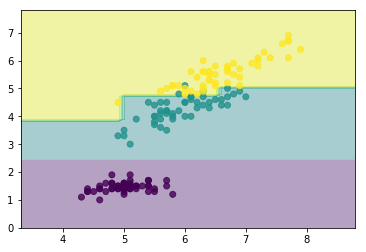

In [2]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier


# 仍然使用自带的iris数据
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# 训练模型，限制树的最大深度4
clf = DecisionTreeClassifier(max_depth=4)
#拟合模型
clf.fit(X, y)


# 画图
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.show()